In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, sys
from collections import defaultdict

from scipy.optimize import curve_fit

# TODO: NOT SURE OF THE CORRECT VOLTAGE-CHANNEL ASSOCIATION <<---
def load_hv(filename, voltages):

    """
    Makes a dictionary with key the channelId and as value the voltage set
    """
    
    for line in open(filename, "r"):

        buff = line.split(",")

        if "{icarus" in buff[0]:

            try: 
                pmtid = int(buff[6])
                value = int( buff[7] )

                voltages[360-pmtid].append(value)
            
            except ValueError:
                continue 
        
    
    return


def load_files_background(path="../background/"):
    unsrt_files = [ file for file in os.listdir(path) if '.csv' in file ]
    files=[ unsrt_files[2], unsrt_files[0], unsrt_files[1] ]
    df = pd.concat( [pd.read_csv(path+file, sep=',') for file in files ] )
    df=df.groupby("pmt").agg({'mu':list, 'q':list}).reset_index()
    return df

def load_files_laser(filename="../laser-fit-result.txt"):
    df = pd.read_csv(filename, sep=',')
    return df[['ch', 'q1', 'q2', 'q3', 'eq1', 'eq2', 'eq3']]


def get_list_for_ch( ch, df, df1 ):
    pp = df[df.ch==ch]
    lsr_q = [ pp.q1.values[0], pp.q2.values[0], pp.q3.values[0] ] 
    lsr_eq = [ pp.eq1.values[0], pp.eq2.values[0], pp.eq3.values[0] ] 
    bkg_q = df1[df1.pmt==PMT].q.values[0]
    bkg_eq = np.array(df1[df1.pmt==PMT].q.values[0])*0.02
    return lsr_q, lsr_eq , bkg_q, bkg_eq



voltages = defaultdict(list)
for suffix in [ "m50", "m30", "nominal", "p30", "p50" ]: 
    load_hv( "../hvdb/Sy4527channels_22122021_{}.sub".format(suffix), voltages )

bkg = load_files_background()
lsr = load_files_laser()

compare_ch_list = lsr.ch.values
bkg = bkg[bkg.pmt.isin(compare_ch_list)]

FileNotFoundError: [Errno 2] No such file or directory: '../hvdb/Sy4527channels_m30.sub'

In [ ]:
def poly( v, a, k ):
    return a*np.power(v,k)

def dofit( data_x, data_y, error_y ):
    
    params, pcov = curve_fit(poly, data_x, data_y, sigma=error_y, p0=[6e-23, 7])
    print(params, np.diag(pcov)**2 )
    
    xint = np.linspace( np.min(data_x)-10, np.max(data_x)+10, 100 )
    yint = poly(xint, params[0], params[1])
    
    return params, pcov, xint, yint
    

# PLOT one

fig, ax = plt.subplots(1,1, figsize=(10, 4.8))

PMT = 359

    
lsr_q, lsr_eq, bkg_q, bkg_eq = get_list_for_ch(PMT, lsr, bkg)
       
kargs={'marker':'o', 'lw':0.0, 'elinewidth':2.0}

out=ax.errorbar( x=voltages[PMT], y=bkg_q, yerr=bkg_eq, label="Bakground", **kargs )
_,_, xint, yint = dofit( voltages[PMT], bkg_q, bkg_eq )
ax.plot(xint, yint, color=out[0].get_color(), lw=1.0)

out=ax.errorbar( x=voltages[PMT], y=lsr_q, yerr=lsr_eq, label='Laser', **kargs)
_,_, xint, yint = dofit( voltages[PMT], lsr_q, lsr_eq )
ax.plot(xint, yint, color=out[0].get_color(), lw=1.0)


ax.set_ylabel("Gain [$10^7$ electrons]")
ax.set_xlabel("Voltage [V]")
ax.legend(title ='PMT%d'%PMT)

plt.tight_layout()
plt.show()



[1.37188471e-23 7.15026255e+00] [[ 1.00596429e-45 -1.00864975e-23]
 [-1.00864975e-23  1.01135250e-01]]
[1.66510216e-23 7.12141559e+00] [[ 5.52600688e-47 -4.56124560e-25]
 [-4.56124560e-25  3.76495691e-03]]
[2.69089215e-20 6.11637009e+00] [[ 3.69162984e-40 -1.89633897e-21]
 [-1.89633897e-21  9.74133431e-03]]
[4.51430615e-23 7.01264410e+00] [[ 4.86057602e-45 -1.48829825e-23]
 [-1.48829825e-23  4.55718690e-02]]
[2.49414248e-23 7.02183908e+00] [[ 5.27187571e-46 -2.87800168e-24]
 [-2.87800168e-24  1.57116050e-02]]
[3.33145693e-27 8.26698365e+00] [[ 8.68969929e-53 -3.55156308e-27]
 [-3.55156308e-27  1.45156975e-01]]
[1.7316935e-20 6.0683491e+00] [[ 1.33286686e-40 -1.04717722e-21]
 [-1.04717722e-21  8.22729749e-03]]
[3.24752745e-23 6.92186351e+00] [[ 9.20659348e-45 -3.85700958e-23]
 [-3.85700958e-23  1.61586852e-01]]
[7.32148953e-20 5.97364266e+00] [[ 1.85888611e-38 -3.49207618e-20]
 [-3.49207618e-20  6.56022854e-02]]
[5.95150765e-22 6.62810036e+00] [[ 6.81561095e-43 -1.57508392e-22]
 [-1.575

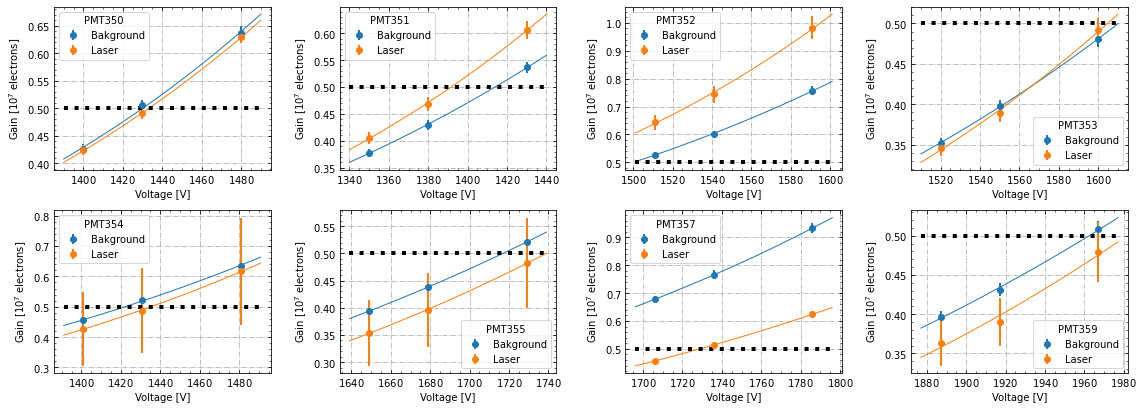

In [72]:
# PLOT ALL

fig, ax = plt.subplots(2,4, figsize=(16, 5.8))

for i, PMT in enumerate( [350, 351, 352, 353, 354, 355, 357, 359] ):
    

    c=i%4
    r=i//4
    
    lsr_q, lsr_eq, bkg_q, bkg_eq = get_list_for_ch(PMT, lsr, bkg)
       
    kargs={'marker':'o', 'lw':0.0, 'elinewidth':2.0}

    out=ax[r][c].errorbar( x=voltages[PMT], y=bkg_q, yerr=bkg_eq, label="Bakground", **kargs )
    _,_, xint, yint = dofit( voltages[PMT], bkg_q, bkg_eq )
    ax[r][c].plot(xint, yint, color=out[0].get_color(), lw=1.0)

    out=ax[r][c].errorbar( x=voltages[PMT], y=lsr_q, yerr=lsr_eq, label='Laser', **kargs)
    _,_, xint, yint = dofit( voltages[PMT], lsr_q, lsr_eq )
    ax[r][c].plot(xint, yint, color=out[0].get_color(), lw=1.0)
    
    ax[r][c].plot( [xint[0], xint[-1]], [0.5,0.5], ':', color='black', lw=4.0 ) 
    
    ax[r][c].set_ylabel("Gain [$10^7$ electrons]")
    ax[r][c].set_xlabel("Voltage [V]")
    ax[r][c].legend(title ='PMT%d'%PMT)

plt.tight_layout()
plt.show()